# Final Project


## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

<h2>Naciye Aydin</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
df = pd.read_csv('diamonds.csv')
df

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values

In [4]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


The data set consists of int, float and object data types.

In [5]:
df.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


####  X,Y, Z (genişilik, uzunluk) değerleri minimum değerleri 0 olmamalı.

In [6]:
# Missing data
print(f"Sum of missing data : {df.isna().sum().sum()} \nMissing data:\n{df.isna().sum()}")

Sum of missing data : 0 
Missing data:
index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


# Exploratory Data Analysis

<AxesSubplot:xlabel='price', ylabel='count'>

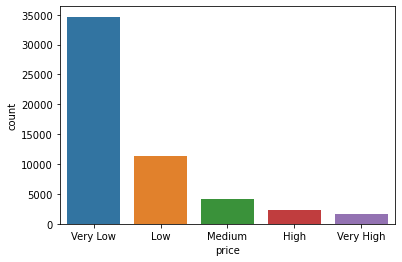

In [7]:
# Our label Distribution (countplot)
sns.countplot(x ='price', data = df)

In [8]:
df['price'].unique()

array(['Very Low', 'Low', 'Medium', 'High', 'Very High'], dtype=object)

array([[<AxesSubplot:title={'center':'carat'}, xlabel='price'>,
        <AxesSubplot:title={'center':'depth'}, xlabel='price'>],
       [<AxesSubplot:title={'center':'table'}, xlabel='price'>,
        <AxesSubplot:title={'center':'x'}, xlabel='price'>],
       [<AxesSubplot:title={'center':'y'}, xlabel='price'>,
        <AxesSubplot:title={'center':'z'}, xlabel='price'>]], dtype=object)

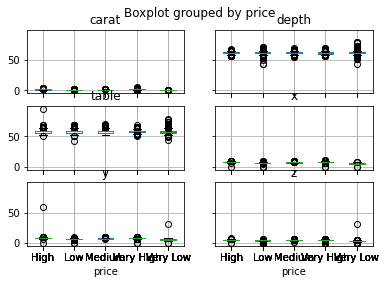

In [9]:
df.boxplot(by='price', column = ['carat', 'depth', 'table', 'x', 'y', 'z'], grid = True)

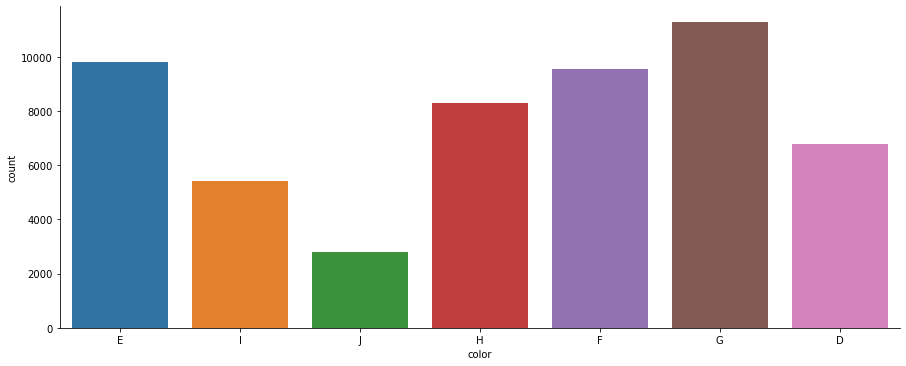

In [10]:
sns.catplot(x='color', data = df , kind='count',aspect=2.5 )

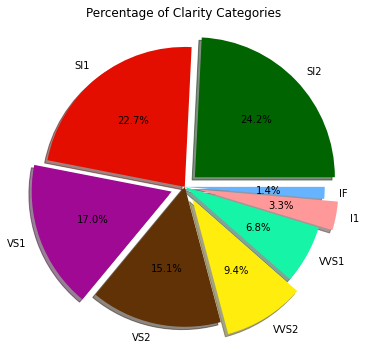

In [11]:
# clarity distrubute

labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4260e+03, 5.0770e+03, 1.8246e+04, 2.2654e+04, 5.0380e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <BarContainer object of 25 artists>)

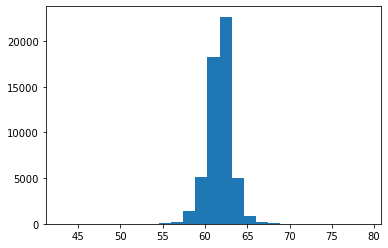

In [12]:
plt.hist('depth' , data=df , bins=25) 

 #### Derinlik yüzdesi hakkındaki bilgiler elmasın parlaklığı ile ilgili önemli bir özelliktir.

<AxesSubplot:xlabel='table', ylabel='Density'>

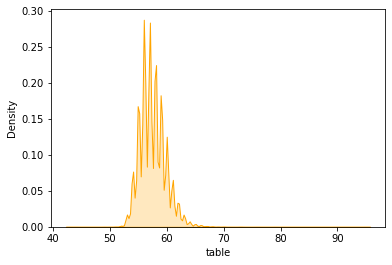

In [13]:
sns.kdeplot(df['table'] ,shade=True , color='orange')

#### Table genişliğinin çok büyük veya küçük olması parklalığı olumsuz etkiler.

In [14]:
#correlation matrix.
corr = df.corr()
corr

,index,carat,depth,table,x,y,z
index,1.000000,-0.377983,-0.034800,-0.100830,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,-0.405440,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


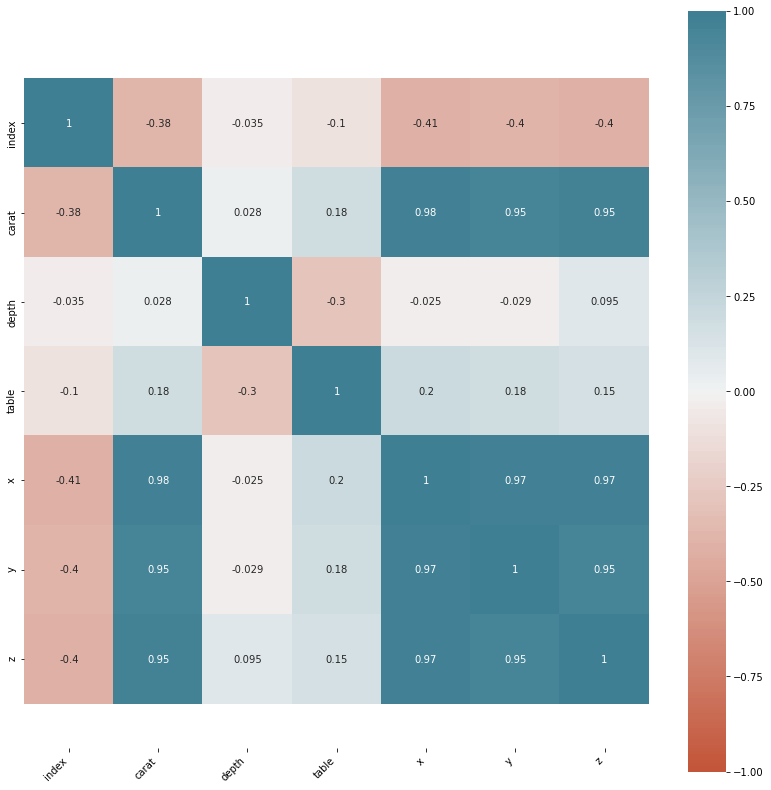

In [15]:
#Draw correlation matrix.
plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

#### Korelasyon matrisine baktığımızda X, Y, Z sütunları çok yüksek ilişkili çıktı. describe metodunda x,y,z minumum değerlerinin 0 içermesi ve buradaki çok yüksek korelasyon ilişkisi gürültülü veri olduğunu gösteriyor.

# Preprocessing





In [16]:
#Check duplicate values
print(f"Sum of duplicate values : {df.duplicated().sum()} \nDuplicate values:\n{df.duplicated()}")

Sum of duplicate values : 0 
Duplicate values:
0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool


#### Duplicate değer yoktur.

In [17]:
# Outlier Detection
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df.loc[:, df.describe().columns]))
z

array([[1.7320187 , 1.19816781, 0.17409151, ..., 1.58783745, 1.53619556,
        1.57112919],
       [1.73195448, 1.24036129, 1.36073849, ..., 1.64132529, 1.65877419,
        1.74117497],
       [1.73189025, 1.19816781, 3.38501862, ..., 1.49869105, 1.45739502,
        1.74117497],
       ...,
       [1.73189025, 0.20662095, 0.73334442, ..., 0.06343409, 0.04774083,
        0.03013526],
       [1.73195448, 0.13092691, 0.52310533, ..., 0.37338325, 0.33750627,
        0.28520393],
       [1.7320187 , 0.10113725, 0.31452784, ..., 0.08811478, 0.11861587,
        0.14349912]])

In [18]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

1388

In [19]:
df_new = df.drop(outliers,axis = 0).reset_index(drop = False)
display(df_new)

,level_0,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
3,4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
4,5,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...
52547,53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
52548,53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
52549,53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
52550,53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [20]:
df_new['volume'] = df_new['x'] * df_new['y'] * df_new['z']
df_new.drop(['x','y','z'], axis = 1, inplace = True)
df_new = df_new[df_new['volume'] < 1000]
df_new.head()

,level_0,index,carat,cut,color,clarity,depth,table,price,volume
0,0,1,0.23,Ideal,E,SI2,61.5,55.0,Very Low,38.202030
1,1,2,0.21,Premium,E,SI1,59.8,61.0,Very Low,34.505856
2,3,4,0.29,Premium,I,VS2,62.4,58.0,Very Low,46.724580
3,4,5,0.31,Good,J,SI2,63.3,58.0,Very Low,51.917250
4,5,6,0.24,Very Good,J,VVS2,62.8,57.0,Very Low,38.693952


#### X,Y,Z değerleri elmasların ebatları hakkında bilgi verir.  x,y,z sütunlarının çarpımıyla yeni bir feature (volume) oluşturulur.  X,Y,Z sütunlarına gerek kalmadığından bu feature'ler kaldırılır. kaldırılır.

In [21]:
from sklearn.preprocessing import LabelEncoder
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


df_new['cut'] = label_cut.fit_transform(df_new['cut'])
df_new['color'] = label_color.fit_transform(df_new['color'])
df_new['clarity'] = label_clarity.fit_transform(df_new['clarity'])

In [22]:
y = df_new['price']
X = df_new.drop(['price'], axis=1)


In [23]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
print("Number of train values: {} \nNumber of test values: {}".format(X_train.shape[0], X_test.shape[0]))

Number of train values: 36786 
Number of test values: 15766


# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [25]:
#Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

# Model 1

In [27]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=8, random_state=42)
DTC.fit(X_train,y_train)
train_score = DTC.score(X_train,y_train)
test_score = DTC.score(X_test,y_test)

print("Accuracy of train:",train_score)
print("Accuracy of test:",test_score)
print("\nBias for training:",1-train_score)
print("Bias for test:",1-test_score)
print("\nVariance:",(1-test_score)-(1-train_score))
print("\n\n")


Accuracy of train: 1.0
Accuracy of test: 0.9998097171127743

Bias for training: 0.0
Bias for test: 0.00019028288722566788

Variance: 0.00019028288722566788





In [28]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = DTC.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       609
         Low       1.00      1.00      1.00      3288
      Medium       1.00      1.00      1.00      1175
   Very High       1.00      1.00      1.00       393
    Very Low       1.00      1.00      1.00     10301

    accuracy                           1.00     15766
   macro avg       1.00      1.00      1.00     15766
weighted avg       1.00      1.00      1.00     15766



Text(204.36, 0.5, 'True Labels')

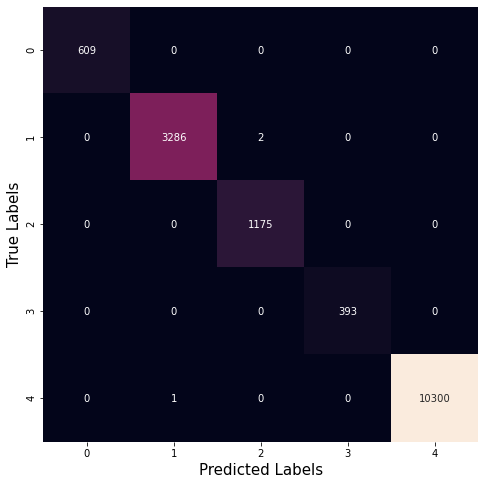

In [29]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)

In [30]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test,pred, average='macro')))

Precision = 0.9995993071751725
Recall = 0.9998589299080642
Accuracy = 0.9998097171127743
F1 Score = 0.9997289689533485


# Model 2

In [31]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train,y_train)
train_score = mlp.score(X_train,y_train)
test_score = mlp.score(X_test,y_test)

print("Accuracy of train:",train_score)
print("Accuracy of test:",test_score)
print("\nBias for training:",1-train_score)
print("Bias for test:",1-test_score)
print("\nVariance:",(1-test_score)-(1-train_score))
print("\n\n")


Accuracy of train: 0.9839612896210514
Accuracy of test: 0.9824305467461626

Bias for training: 0.01603871037894855
Bias for test: 0.017569453253837408

Variance: 0.0015307428748888574





In [32]:
pred2 = mlp.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       609
         Low       1.00      1.00      1.00      3288
      Medium       1.00      1.00      1.00      1175
   Very High       1.00      1.00      1.00       393
    Very Low       1.00      1.00      1.00     10301

    accuracy                           1.00     15766
   macro avg       1.00      1.00      1.00     15766
weighted avg       1.00      1.00      1.00     15766



Text(204.36, 0.5, 'True Labels')

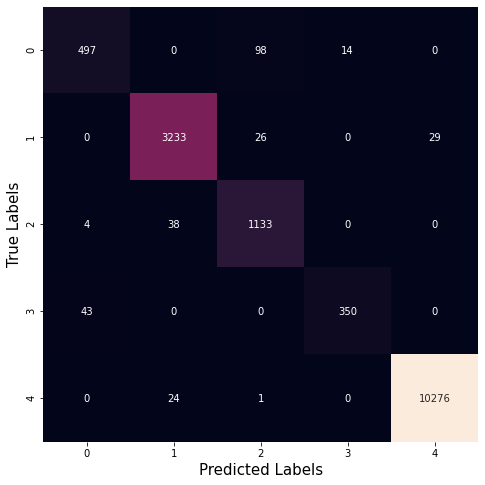

In [33]:
cm = confusion_matrix(y_test, pred2)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)

In [34]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred2, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred2, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred2)))
print("F1 Score = {}".format(f1_score(y_test,pred2, average='macro')))

Precision = 0.9508293552831164
Recall = 0.9303556144290024
Accuracy = 0.9824305467461626
F1 Score = 0.9395536918417677


# Model 3

In [35]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)
train_score = mlp.score(X_train,y_train)
test_score = mlp.score(X_test,y_test)

print("Accuracy of train:",train_score)
print("Accuracy of test:",test_score)
print("\nBias for training:",1-train_score)
print("Bias for test:",1-test_score)
print("\nVariance:",(1-test_score)-(1-train_score))
print("\n\n")

Accuracy of train: 0.9839612896210514
Accuracy of test: 0.9824305467461626

Bias for training: 0.01603871037894855
Bias for test: 0.017569453253837408

Variance: 0.0015307428748888574





In [36]:
pred3 = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       609
         Low       1.00      1.00      1.00      3288
      Medium       1.00      1.00      1.00      1175
   Very High       1.00      1.00      1.00       393
    Very Low       1.00      1.00      1.00     10301

    accuracy                           1.00     15766
   macro avg       1.00      1.00      1.00     15766
weighted avg       1.00      1.00      1.00     15766



Text(204.36, 0.5, 'True Labels')

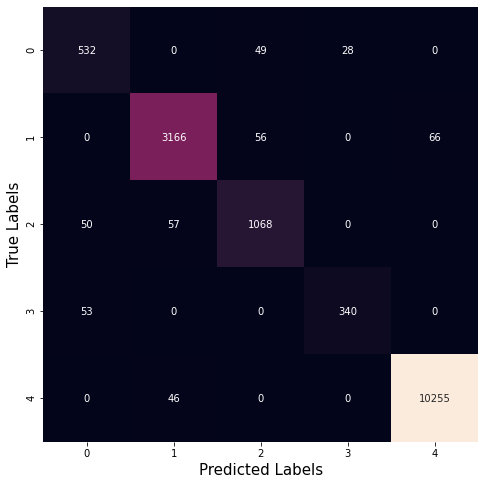

In [37]:
cm = confusion_matrix(y_test, pred3)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)

In [38]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred3, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred3, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred3)))
print("F1 Score = {}".format(f1_score(y_test,pred3, average='macro')))

Precision = 0.9268582833850335
Recall = 0.9212138257952978
Accuracy = 0.9743118102245338
F1 Score = 0.923766279156375


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

Fiyat tahmini yaomak için F1 scorunu esas alarak analiz yaptığımda decisiontree algoritması %99 gibi yüksek bir sonuç verdiğinden algortimanın overfitting yaptığı sonucuna vardım.


SVM algoritması ile F1 skoru : 0.9237, neurolNewtwork  algoritması ile F1 skoru : 0.9395 'lük bir   diğer ile birbirine yakın sonuçlar vermiştr.En iyi değeri SVM algoritması vermiştir. Recall ve precision metrikleri ile bulunan sonuçlar da svm ve neural network için birbirine yakın sonuçlar vermiştir.

Veri dengeli olmadığı için accuracy metriği ile analiz yapılmadı.


Overfitting problemi çözüldüğünde modelde iyileşmeler gerçekleşebilir.